<a href="https://colab.research.google.com/github/MQ-COMP2200-COMP6200/portfolio-part-4-SinanMH-101/blob/main/Portfolio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analysis of Video Game Sales Record Dataset

The main objective of this project is to get a better understanding of the factors that make a game successful. The goal is to analyse the historical data to offer meaningful insights to new developers or companies in order to maximise success and profits. The following topics will be discussed in depht:
- Which Genre of the games sell the most on average, does this vary depending on the region?
- What’s the Relationship Between Critic Score and User Score and Global Sales?
- Which Factors Most Strongly Influence Global Sales? Is it possible to reliably predict Global Sales?


###About this file

The Video_Games.csv file provides comprehensive data on video game sales, ratings, and user insights globally, including details such as the game's name, platform, year of release, genre, publisher, sales in different regions, critic and user scores, and ESRB rating.

* **Name**: The name of the video game. (String)
* **Platform**: The platform on which the game is available, such as PC, PS4, Xbox, etc. (String)
* **Year_of_Release**: The year in which the game was released. (Integer)
* **Genre**: The genre of the game, such as Action, Sports, etc. (String)
* **Publisher**: The company that published the game. (String)
* **NA_Sales**: The sales of the game in North America, in millions. (Float)
* **EU_Sales**: The sales of the game in Europe, in millions. (Float)
* **JP_Sales**: The sales of the game in Japan, in millions. (Float)
* **Other_Sales**: The sales of the game in other regions, in millions. (Float)
* **Global_Sales**: The total global sales of the game, in millions. (Float)
* **Critic_Score**: The average score given to the game by critics. (Float)
* **Critic_Count**: The number of critics who reviewed the game. (Integer)
* **User_Score**: The average score given to the game by users. (Float)
* **User_Count**: The number of users who reviewed the game. (Integer)
* **Developer**: The company that developed the game. (String)
* **Rating**: The ESRB rating of the game, such as E for Everyone, T for Teen, or M for Mature. (String)

File source: https://www.kaggle.com/datasets/thedevastator/video-game-sales-and-ratings?select=Video_Games.csv

In [1]:
#Importing all required libraries

# Core libraries
import pandas as pd
import numpy as np  # Often used alongside pandas
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE #If you are using it again

# Metrics for model evaluation
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error,
                             accuracy_score, f1_score)

In [2]:
#loading in data
sales=pd.read_csv("/content/Video_Games.csv")

### Exploring and cleaning the data

In [3]:
sales.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

In [5]:
#Checking how many null values there are
print(sales.isnull().sum())

index                 0
Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count         9210
Developer          6688
Rating             6836
dtype: int64


In [6]:
#Dropping all rows with a null value
sales=sales.dropna()
print("Size of data set after cleaning:", sales.shape)
sales.head()

Size of data set after cleaning: (6938, 17)


,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


### Which Genre of the games sell the most on average, does this varry depending on the region?

#### Average Global Sales by Genre

In [7]:
# Group by genre and mean global sales
genre_sales = sales.groupby('Genre')['Global_Sales'].mean()

# Sort genres by global sales in descending order
top_genres = genre_sales.sort_values(ascending=False).iloc[0:5]

# Print the results
print("Top 5 Best-Selling Genres:")
print(top_genres)

Top 5 Best-Selling Genres:
Genre
Misc        1.106964
Shooter     0.958971
Platform    0.947153
Sports      0.878496
Racing      0.837885
Name: Global_Sales, dtype: float64


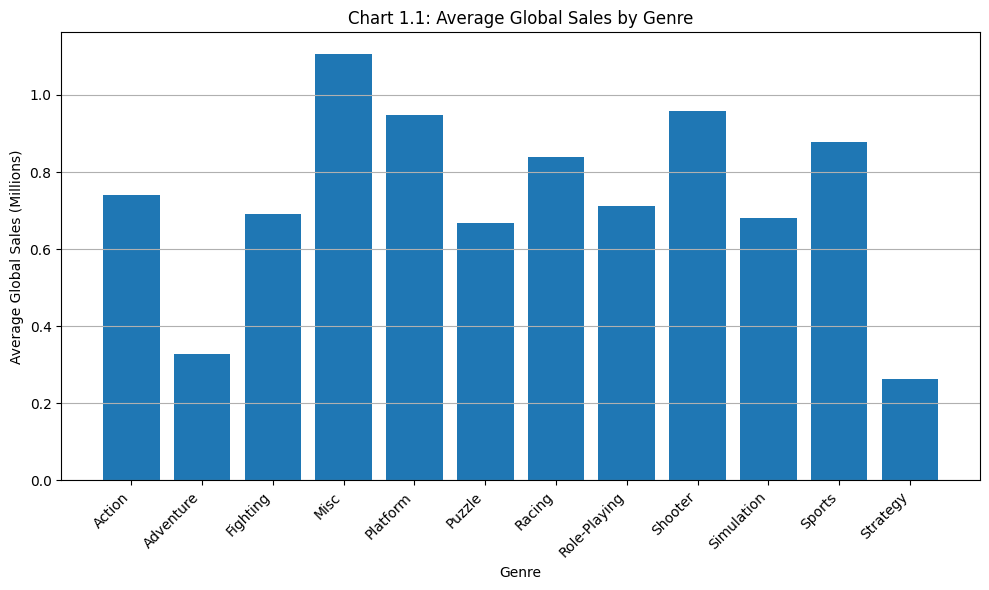

In [8]:
# Group by genre and calculate the average global sales
genre_sales = sales.groupby('Genre')['Global_Sales'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(genre_sales.index, genre_sales.values)
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (Millions)')
plt.title('Chart 1.1: Average Global Sales by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Top 5 best global selling Genres, according the chart are Misc, Shooter, Platform, Sports and Racing. Now we will check the average sales based on each region and see if they differ.
     
    
      
     

#### Sales by Genre and Region

In [9]:
# Assuming your DataFrame is named 'sales'

def top_5_genres_by_region_avg(sales_data, region):

    genre_sales = sales_data.groupby('Genre')[region].mean()  # Calculate average sales
    top_genres = genre_sales.sort_values(ascending=False).iloc[0:5]
    return top_genres

# Get the top 5 genres for each region based on average sales
top_NA_avg = top_5_genres_by_region_avg(sales, 'NA_Sales')
top_EU_avg = top_5_genres_by_region_avg(sales, 'EU_Sales')
top_JP_avg = top_5_genres_by_region_avg(sales, 'JP_Sales')
top_Other_avg = top_5_genres_by_region_avg(sales, 'Other_Sales')

# Print the results
print("Top 5 Genres in North America (Average Sales):")
print(top_NA_avg)
print("\nTop 5 Genres in Europe (Average Sales):")
print(top_EU_avg)
print("\nTop 5 Genres in Japan (Average Sales):")
print(top_JP_avg)
print("\nTop 5 Genres in Other Regions (Average Sales):")
print(top_Other_avg)

Top 5 Genres in North America (Average Sales):
Genre
Misc        0.592117
Shooter     0.524129
Platform    0.484988
Sports      0.483050
Racing      0.395364
Name: NA_Sales, dtype: float64

Top 5 Genres in Europe (Average Sales):
Genre
Misc        0.322551
Shooter     0.308247
Racing      0.290761
Platform    0.271703
Sports      0.260539
Name: EU_Sales, dtype: float64

Top 5 Genres in Japan (Average Sales):
Genre
Role-Playing    0.172493
Puzzle          0.126949
Platform        0.109221
Simulation      0.087200
Misc            0.084770
Name: JP_Sales, dtype: float64

Top 5 Genres in Other Regions (Average Sales):
Genre
Misc       0.107168
Shooter    0.104005
Racing     0.102318
Sports     0.098734
Action     0.090424
Name: Other_Sales, dtype: float64


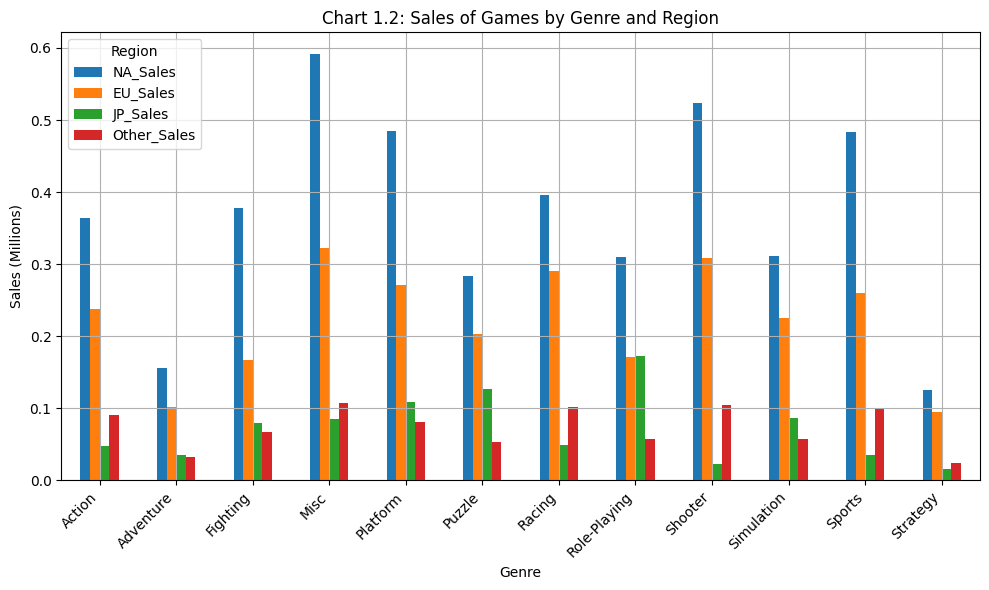

In [10]:
# Group by genre and mean sales for each region
genre_sales = sales.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

# Create the bar chart
genre_sales.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.title('Chart 1.2: Sales of Games by Genre and Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Region')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.grid(True)
plt.show()

From the Chart 1.2 and code above, we can see that the top 5 best selling genres on average for each region are:
- **NA**: Misc, Shooter, Platform, Sports, Racing
- **EU**: Misc, Shooter, Racing, Platform, Sports
- **JP**: Role-Playing, Puzzle, Platform, Simulation, Misc
- **Other**: Misc, Shooter, Racing, Sports, Action

And from Chart 1.1, we see that the top 5 best genres on average are:
- **Global**: Misc, Shooter, Platform, Sports and Racing



#### Analysis and Insights
In conclusion, we can offer the following insights from this analysis:

* **Insight 1**:  North America (NA) and Europe (EU) have similar tastes: Both regions show a strong preference for Misc, Shooter, Platform, Sports, and Racing genres, although in slightly different orders. This suggests a shared gaming culture and preferences across these Western markets.
* **Insight 2**:  Japan (JP) has unique preferences: Role-Playing, Puzzle, and Simulation games are among the top genres in Japan, while they are not as prominent in NA or EU. This highlights the distinct gaming preferences in Japan, with a focus on local game developers and genres.
* **Insight 3**:  "Other" regions show a mix: The "Other" regions show a blend of preferences from NA/EU and JP, with Misc, Shooter, Racing, Sports, and Action games in the top 5. This could be due to the diversity of markets included in this category, with some leaning towards Western genres and others towards Japanese genres.
* **Insight 4**:  Misc genre's dominance: The "Misc" genre is the top performer in NA, EU, and Other regions, indicating a wide appeal and diversity of games within this category. It's worth exploring what specific types of games fall under "Misc" to understand its popularity.
* **Insight 5**:  Platform games' enduring appeal: Platform games remain popular across all regions, appearing in the top 5 for NA, EU, and JP. This suggests a continued fondness for classic platformers or the emergence of new and innovative platforming experiences.

* **Insight 6**:   Alignment with NA and EU: The global top 5 genres (Misc, Shooter, Platform, Sports, Racing) closely align with the preferences in North America (NA) and Europe (EU). This suggests that these regions have a strong influence on global gaming trends, likely due to their large market size and established gaming culture.

* **Insight 7**:  Divergence with Japan: Japan (JP) exhibits a significant divergence from global and Western preferences, with Role-Playing, Puzzle, and Simulation games being more prominent. This highlights the unique gaming culture and preferences in Japan, driven by local game developers and a focus on specific genres.

### Exploring Critic Score, User Score and Global Sales with Clustering


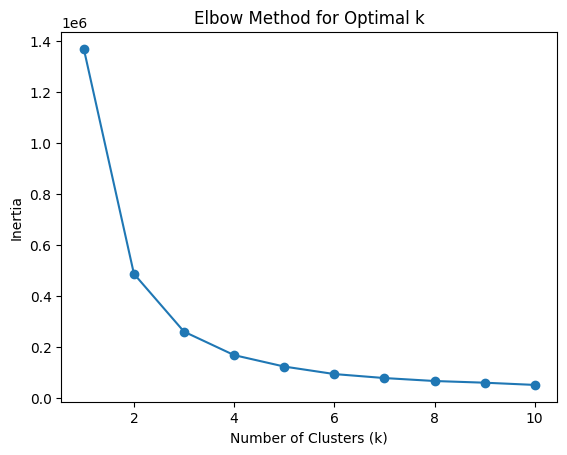

Cluster Centers:
 [[47.06689246  5.69373412  0.29843353]
 [67.66294038  7.14634146  0.48049458]
 [82.91726106  7.8549572   1.28365906]]
         Critic_Score  User_Score  Global_Sales
Cluster                                        
0           47.066892    5.693734      0.298434
1           67.662940    7.146341      0.480495
2           82.917261    7.854957      1.283659


In [11]:
# Copy the sales data and make necessary adjustments
sales_cluster = sales.copy()

# Convert 'User_Score' into float
sales_cluster['User_Score'] = sales_cluster['User_Score'].astype(float)

# Select relevant columns for clustering: Critic_Score, User_Score, and Global_Sales
cluster_data = sales_cluster[['Critic_Score', 'User_Score', 'Global_Sales']]

# Dropping the record for Wii Sports (index 0) as an outlier for better chart readability
cluster_data = cluster_data.drop(index=0)

# Handle missing values if any (optional step)
cluster_data = cluster_data.dropna()

# Elbow Method to determine optimal k (number of clusters)
inertia = []
for i in range(1, 11):  # Check for k values from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cluster_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow chart to find the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Use the optimal k from the Elbow Method, assuming it shows 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(cluster_data)

# Add the cluster labels to the original DataFrame
cluster_data['Cluster'] = kmeans.labels_

# Display the cluster centers (optional, to inspect the center values for each cluster)
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Analyze the clusters
# You can group the data by 'Cluster' to inspect how the games in each cluster perform in terms of Critic_Score, User_Score, and Global_Sales
cluster_analysis = cluster_data.groupby(['Cluster']).agg('mean')
print(cluster_analysis)

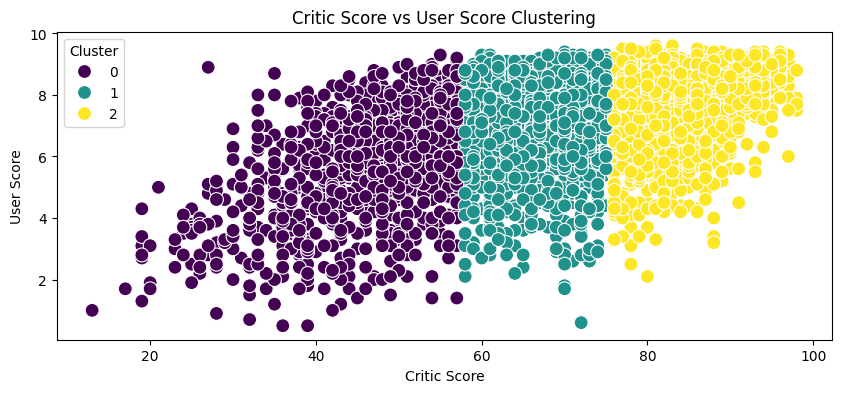

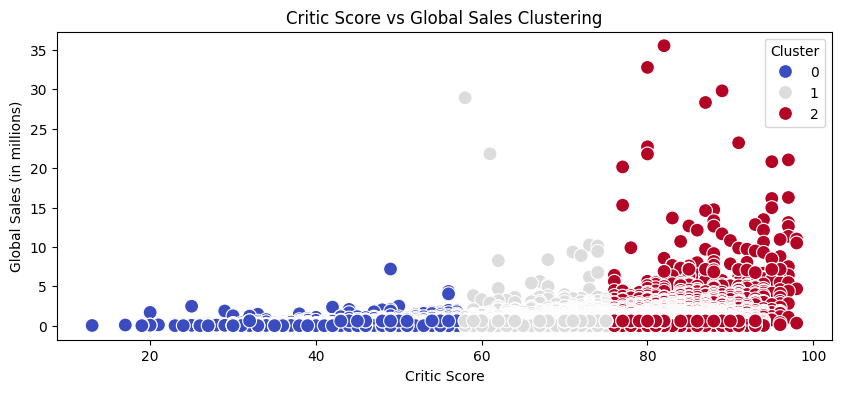

In [12]:
# Visualization: Plotting Critic_Score vs User_Score, colored by Cluster
plt.figure(figsize=(10, 4))
sns.scatterplot(data=cluster_data, x='Critic_Score', y='User_Score', hue='Cluster', palette='viridis', s=100)
plt.title('Critic Score vs User Score Clustering')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.legend(title='Cluster')
plt.show()

# Visualization: Plotting Global Sales vs Critic_Score, colored by Cluster
plt.figure(figsize=(10, 4))
sns.scatterplot(data=cluster_data, x='Critic_Score', y='Global_Sales', hue='Cluster', palette='coolwarm', s=100)
plt.title('Critic Score vs Global Sales Clustering')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Cluster')
plt.show()

#### Visual Insights:

- **First plot (Critic Score vs User Score):**
  * The clusters are distinctly separated based on both critic and user scores.
  * Cluster 2 (Yellow) is in the top right with high critic and user scores, showing a clear association between high ratings and the most successful games.
  * Cluster 1 (Teal) occupies the middle range of scores, representing games with moderate success.
  * Cluster 0 (Purple), on the left side, features games with the lowest ratings, showing a direct correlation between poor ratings and poor sales.

- Second plot (Critic Score vs Global Sales):
  * In terms of global sales, Cluster 2 (Red) dominates, with most of the games in this cluster achieving high sales, as seen in the cluster's distribution towards the right side of the chart. The strong critic scores usually translate to higher sales.
  * Cluster 0 (Blue) games barely make a dent in global sales, and their low critic scores further reinforce their poor commercial performance.
  * Cluster 1 (Grey) games have more scattered sales, but still outperform Cluster 0.

#### Conclusion:

* High Critic and User Scores Drive Sales: Games that perform well with both critics and users, as seen in Cluster 2, tend to achieve the highest global sales.
* Low Reviews Lead to Lower Sales: Cluster 0 shows a clear trend of low critic and user scores correlating with low sales.
* Mid-Level Games Aren’t Big Sellers: Games in Cluster 1 show that even games with moderate success in ratings may not always translate to high sales, though they perform better than poorly rated games.

This clustering confirms the relationship between game success (sales) and how it is rated by both critics and users.


###Predicting Global Sales using Linear and Logistic Regression

In [13]:
prediction_data=sales.copy()

# Encoding categorical variables (e.g., Platform, Genre, Rating, Publisher, Developers)
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()

prediction_data['Platform']=encoder.fit_transform(prediction_data[['Platform']])
prediction_data['Genre']=encoder.fit_transform(prediction_data[['Genre']])
prediction_data['Rating']=encoder.fit_transform(prediction_data[['Rating']])
prediction_data['Publisher']=encoder.fit_transform(prediction_data[['Publisher']])
prediction_data['Developer']=encoder.fit_transform(prediction_data[['Developer']])


#Converting user_score to float
prediction_data['User_Score']=prediction_data['User_Score'].astype(float)

#Dropping Wii Sports Record since its an obvious outlier
prediction_data=prediction_data.drop(index=0)

prediction_data.head()




,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2,2,Mario Kart Wii,12.0,2008.0,6.0,160.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,771.0,1.0
3,3,Wii Sports Resort,12.0,2009.0,10.0,160.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,771.0,1.0
6,6,New Super Mario Bros.,2.0,2006.0,4.0,160.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,771.0,1.0
7,7,Wii Play,12.0,2006.0,3.0,160.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,771.0,1.0
8,8,New Super Mario Bros. Wii,12.0,2009.0,4.0,160.0,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,771.0,1.0


In [14]:
#Making new dataframe to make a model to predict Global Sales
glb_pred = prediction_data.drop(columns=['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'index']).copy()
glb_pred.head()

#Creating training and testing data
train_x, test_x, train_y, test_y = train_test_split(glb_pred.drop(columns=['Global_Sales']), glb_pred['Global_Sales'], test_size=0.2, random_state=42)

#Using RFE to find the desired features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(train_x, train_y)
selected_features = train_x.columns[rfe.support_]
print(selected_features)

#making linear regression model
train_x=train_x[selected_features]
test_x=test_x[selected_features]

model = LinearRegression()
model.fit(train_x, train_y)

#Evaluating models
import numpy as np
y_pred = model.predict(test_x)
#mse = mean_squared_error(test_y, y_pred)
mse = ((np.array(test_y)-y_pred)**2).sum()/len(test_y)
mae = mean_absolute_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

Index(['Critic_Count', 'User_Score', 'Rating'], dtype='object')
MSE: 2.317668577334968
MAE: 0.7487762947580636
R2: 0.11440596194363428


**Analysis**:

- MSE (Mean Squared Error): 2.32. This indicates the average squared difference between our model's predictions and the actual Global_Sales values is 2.32
- MAE (Mean Absolute Error): 0.74. The MAE of 0.74 shows that on average, the model's prediction for Global_Sales is off by 0.74 units ( millions of dollars).
- R-squared: 0.13. An R-squared of 0.13 (or 13%) indicates that the model explains about 13% of the variance in Global_Sales. The remaining 87% is unexplained.

Overall, the performance is quite poor and this model is quite unreliable since it only explains 13% of the cariance in Global Sales. We will explore if a polynomial regression would be more reliable

In [15]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(glb_pred[selected_features])

# Create a linear regression model
poly_model = LinearRegression()

# Fit the model using the polynomial features
poly_model.fit(X_poly, glb_pred['Global_Sales'])

# Make predictions on the test set (transform test features as well)
X_test_poly = poly.transform(test_x[selected_features])
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate using MSE, MAE, R-squared, etc.
mse_poly = mean_squared_error(test_y, y_pred_poly)
mae_poly = mean_absolute_error(test_y, y_pred_poly)
r2_poly = r2_score(test_y, y_pred_poly)

print("Polynomial Regression - MSE:", mse_poly)
print("Polynomial Regression - MAE:", mae_poly)
print("Polynomial Regression - R2:", r2_poly)

Polynomial Regression - MSE: 2.248466690156214
Polynomial Regression - MAE: 0.7122309055880496
Polynomial Regression - R2: 0.1408483874513502


#### **Insights:**

- Slight Improvement with Polynomial Regression: The Polynomial Regression model shows marginally better performance across all three metrics. Lower MSE and MAE indicate slightly reduced prediction errors. A slightly higher R-squared suggests a minor improvement in explaining the variance in Global_Sales.

- Limited Overall Improvement: While the Polynomial Regression model is better, the improvements are relatively small. This implies that adding polynomial features might not be the most significant factor in dramatically improving the model's predictive power.

In summary, the Polynomial Regression model offers a marginal improvement over Linear Regression. However, further exploration and consideration of external factors are crucial for developing a more accurate predictive model for video game sales.

 We will also attempt to predict how successful a game could potentially be using Logistic Regression below.

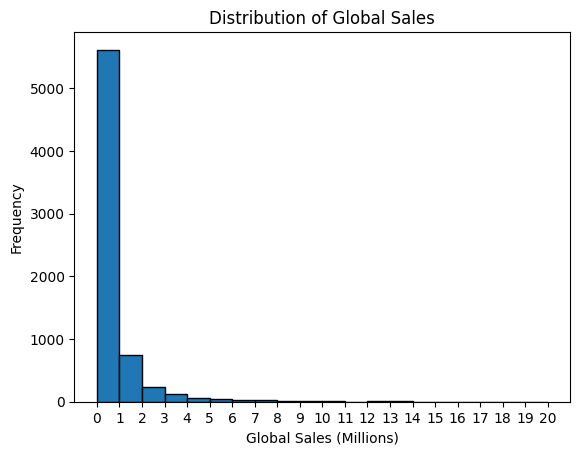

In [16]:
#Checking Distribution of Global Sales for Logistic Regression

# Define bin edges:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Create the histogram:
plt.hist(sales['Global_Sales'], bins=bins, edgecolor='black')

# Customize the plot:
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Frequency')
plt.xticks(bins)  # Set x-axis ticks to bin edges

plt.show()

According to the histogram, most games make less than a million in sales. Thus when categorising success for Logistic Regression, we will consider <=1 to be "low" success games, <=5 to be "medium" success games and anything above that to be "high" success games

In [18]:
#Creating Sales Categories:

def categorize_sales(sales):
    if sales <= 1:
        return 'Low'
    elif sales <= 5:
        return 'Medium'
    else:
        return 'High'

prediction_data['Sales_Category'] = prediction_data['Global_Sales'].apply(categorize_sales)


#Preparing the Data:
# Select features and target variable
features = ['Platform', 'Genre', 'Rating', 'Critic_Score', 'User_Score', 'Critic_Count', 'User_Count', 'Year_of_Release', 'Publisher', 'Developer']
X = prediction_data[features]
y = prediction_data['Sales_Category']

#Spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Using RFE to find the desired features
model = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]


# Get the selected features:
print("Selected Features:", selected_features)

#Training the Logistic Regression Model with Selected Features:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = LogisticRegression(max_iter=10000)
model.fit(X_train_selected, y_train)

# 3.Making Predictions and Evaluations:
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

Selected Features: Index(['Genre', 'Rating', 'Critic_Score', 'User_Score', 'Critic_Count'], dtype='object')
Accuracy: 0.8220461095100865
F1 Score: 0.7800981514506827


#### **Analysis**:

-  **Accuracy**: 0.82. This means that the model correctly predicted the sales category (Low, Medium, High) for approximately 82% of the games in the test set. It suggests a good overall performance in classifying the sales levels.

- **F1 Score:** 0.78. This metric considers both precision and recall, providing a balanced measure of the model's performance. An F1 score of 0.78 indicates a good balance between correctly identifying the positive cases (games in a specific sales category) and minimizing false positives and false negatives.


#### **Insights Gathered:**

- **Good Predictive Capability:** The accuracy of 82% suggests that the model has a good ability to predict the sales category of video games based on the selected features.
- **Balanced Performance:** The F1 score of 0.78 further supports the model's balanced performance, showing that it doesn't heavily favor either precision (minimizing false positives) or recall (minimizing false negatives).
- **Potential for Business Decisions**: The model's performance indicates its potential usefulness in assisting with business decisions related to game development and marketing. For example, it could help identify games with a higher likelihood of achieving higher sales based on their characteristics.

###**Final Results**

**1. Genre Analysis:**

- North America and Europe share similar gaming preferences, favoring genres like Misc, Shooter, Platform, Sports, and Racing.
- Japan has unique preferences, with Role-Playing, Puzzle, and Simulation games being more popular.
- "Other" regions show a mix of preferences from both Western and Japanese markets.
- The "Misc" genre is the top performer across most regions, indicating its broad appeal.
- Platform games maintain their popularity across all regions.



**2. Relationship between Critic Score, User Score, and Global Sales:**

- Clustering analysis revealed a strong correlation between high critic/user scores and global sales.
- Games with high ratings tend to achieve the highest sales, while those with low ratings struggle commercially.
- Moderate ratings don't always translate to high sales.

**3. Sales Prediction:**

- Linear Regression and Polynomial Regression models were used to predict Global Sales.
- While Polynomial Regression showed marginal improvement, both models had limited predictive power (low R-squared).
- This suggests that other factors, not included in the models, significantly influence sales.

**4. Logistic Regression for Sales Category Prediction:**

- A Logistic Regression model was built to predict sales categories (Low, Medium, High).
- It achieved an accuracy of 82% and an F1 score of 0.78, indicating good predictive capability.
- This model could potentially be used to aid business decisions related to game development and marketing.

**Overall Insights:**

- Game ratings (critic and user) have a strong influence on global sales.
- Regional preferences play a significant role in game sales.
- Linear and Polynomial Regression models have limitations in predicting Global Sales.
- Logistic Regression can be adapted to predict sales categories with reasonable accuracy.
- External factors (marketing, competition, etc.) likely play a significant role in game sales and are not captured in the current models.
